<a href="https://colab.research.google.com/github/sanjaydasgupta/data-mining-of-website-articles/blob/master/ml-blogs-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To run this file on Colab [click here](https://colab.research.google.com/github/sanjaydasgupta/data-mining-of-website-articles/blob/master/ml-blogs-eda.ipynb)

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sanjaydasgupta/data-mining-of-website-articles/master/articles.csv')
df.shape

(622, 8)

In [3]:
df.tail(5)

,Unnamed: 0,datetime,author,author_url,title,url,summary,page_no
617,617,2013-10-21T21:27:05+05:30,Tavish Srivastava,https://www.analyticsvidhya.com/blog/author/ta...,Trick to enhance power of Regression model,https://www.analyticsvidhya.com/blog/2013/10/t...,"We, as analysts, specialize in optimization of...",45
618,618,2020-10-01T15:49:19+05:30,NaN,NaN,HackLive – Everything You Need to Get Started ...,https://www.analyticsvidhya.com/blog/2020/10/h...,NaN,45
619,619,2020-10-01T13:22:23+05:30,NaN,NaN,7 Feature Engineering Techniques in Machine Le...,https://www.analyticsvidhya.com/blog/2020/10/7...,NaN,45
620,620,2020-09-30T13:28:08+05:30,NaN,NaN,Hypothesis Generation for Data Science Project...,https://www.analyticsvidhya.com/blog/2020/09/h...,NaN,45
621,621,2020-09-30T12:17:06+05:30,NaN,NaN,How Machine Learning Models Fail to Deliver in...,https://www.analyticsvidhya.com/blog/2020/09/h...,NaN,45


## Remove unpublished records

In [7]:
df2 = df[df['summary'].notnull()].copy()
print(df2.shape)

(442, 8)


## Fix size of data

In [10]:
df3 = df2.iloc[:442, :].copy()

## Scatter plot using t-SNE

In [42]:
def scatter(data, ng):
  vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, ng)).fit(data['title'])
  tfidf = vectorizer.transform(data['title'])
  tsne_xy = TSNE(random_state=42).fit_transform(tfidf)
  data['tsne_x'] = tsne_xy[:, 0]
  data['tsne_y'] = tsne_xy[:, 1]
  color_map = {'regression': 'red', 'classification': 'green', 'clustering': 'blue'}
  def color_selector(t):
    if 'regression' in t:
      return 'red'
    elif 'classification' in t:
      return 'green'
    elif 'clustering' in t:
      return 'blue'
    else:
      return 'gray'
  colors = data['title'].str.lower().map(color_selector).values
  ax = data.plot(kind='scatter', x='tsne_x', y='tsne_y', figsize=(9, 9), grid=True, c=colors)
  ax.set_title('NGram-Range: 1-%d' % ng)

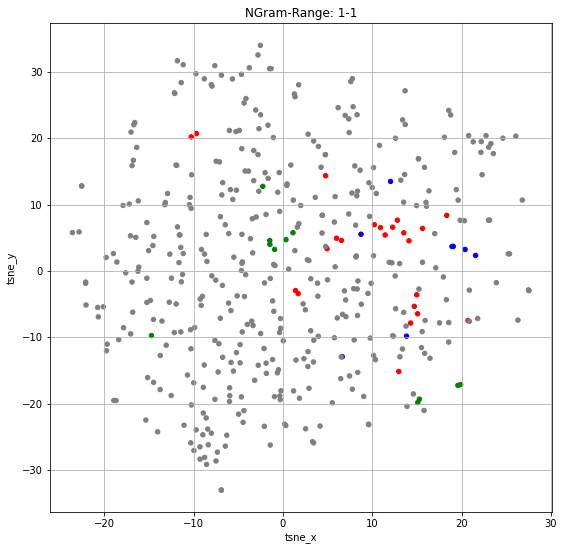

In [43]:
scatter(df3, 1)

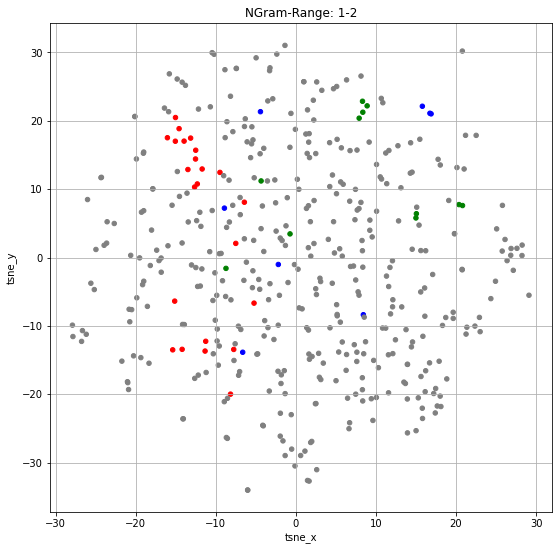

In [44]:
scatter(df3, 2)

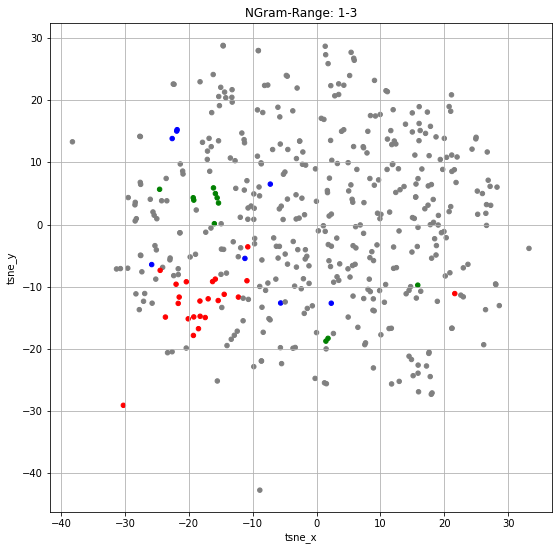

In [45]:
scatter(df3, 3)

## Check vocabulary

In [15]:
print(vectorizer.vocabulary_)
pd.Series(vectorizer.vocabulary_).to_csv('features.csv')

{'feature': 339, 'engineering': 303, 'techniques': 912, 'machine': 529, 'learning': 502, 'know': 487, 'cyber': 241, 'security': 806, 'malicious': 535, 'software': 847, 'installation': 446, 'build': 152, 'sales': 789, 'forecast': 353, 'using': 969, 'microsoft': 559, 'excel': 318, 'just': 479, '10': 0, 'minutes': 564, 'master': 545, 'popular': 665, 'dbscan': 253, 'clustering': 186, 'algorithm': 57, 'integrate': 447, 'web': 993, 'applications': 81, 'flask': 349, 'precision': 677, 'vs': 986, 'recall': 743, 'intuitive': 463, 'guide': 394, 'person': 648, 'lifecycle': 510, 'application': 80, 'prediction': 680, 'scratch': 801, 'plotting': 660, 'decision': 255, 'surface': 896, 'classification': 181, 'algorithms': 58, 'need': 593, 'encoding': 300, 'categorical': 167, 'data': 244, 'python': 718, 'code': 189, 'bias': 129, 'variance': 974, 'fantastic': 335, 'beginners': 125, 'building': 153, 'dataset': 249, 'leveraging': 506, 'efficiency': 297, 'supply': 894, 'chain': 170, 'management': 536, 'trans

## Remove unpublished records

In [23]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2)).fit(df3['title'])
print(len(vectorizer.vocabulary_))
#print(vectorizer.vocabulary_)
tfidf = vectorizer.transform(df3['title'])

3148


In [24]:
tsne_xy = TSNE(random_state=42).fit_transform(tfidf)
df3['tsne_x'] = tsne_xy[:, 0]
df3['tsne_y'] = tsne_xy[:, 1]

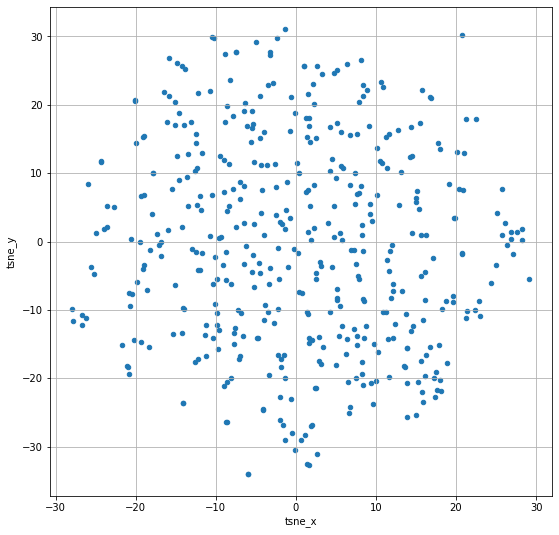

In [25]:
ax = df3.plot(kind='scatter', x='tsne_x', y='tsne_y', figsize=(9, 9), grid=True)

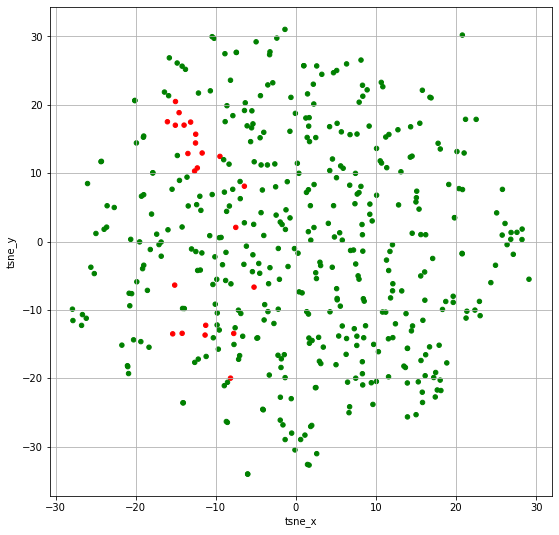

In [27]:
colors = df3['title'].str.lower().map(lambda t: 'red' if 'regression' in t else 'green').values
ax = df3.plot(kind='scatter', x='tsne_x', y='tsne_y', figsize=(9, 9), grid=True, c=colors)

In [ ]:
for t in df_valid[df_valid['title'].str.lower().map(lambda t: 'classification' in t)]['title']:
  print(t)

Plotting Decision Surface for Classification Machine Learning Algorithms
Predicting Movie Genres using NLP – An Awesome Introduction to Multi-Label Classification
A Hands-On Introduction to Time Series Classification (with Python Code)
Tutorial on Text Classification (NLP) using ULMFiT and fastai Library in Python
Complete tutorial on Text Classification using Conditional Random Fields Model (in Python)
A Comprehensive Guide to Understand and Implement Text Classification in Python
Online Learning Guide with Text Classification using Vowpal Wabbit (VW)
Solving Multi-Label Classification problems (Case studies included)
Text Classification & Word Representations using FastText (An NLP library by Facebook)
Imbalanced Data : How to handle Imbalanced Classification Problems
Practical Guide to deal with Imbalanced Classification Problems in R
